## House Price Prediction

**Problem statement :**  The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset.

In [2]:
#importing necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns

In [3]:
#importing dataset
data = pd.read_csv("E:/A/P/internships/shack lab/q1.csv")
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#dimensions
data.shape

(414, 9)

In [5]:
#description
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
#Datatypes of the columns
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [7]:
#dropping the transcation date as it acts as an ID which has unique values
data.drop(['Transaction date'], axis=1, inplace=True)

### Data Visualization

#### HeatMap

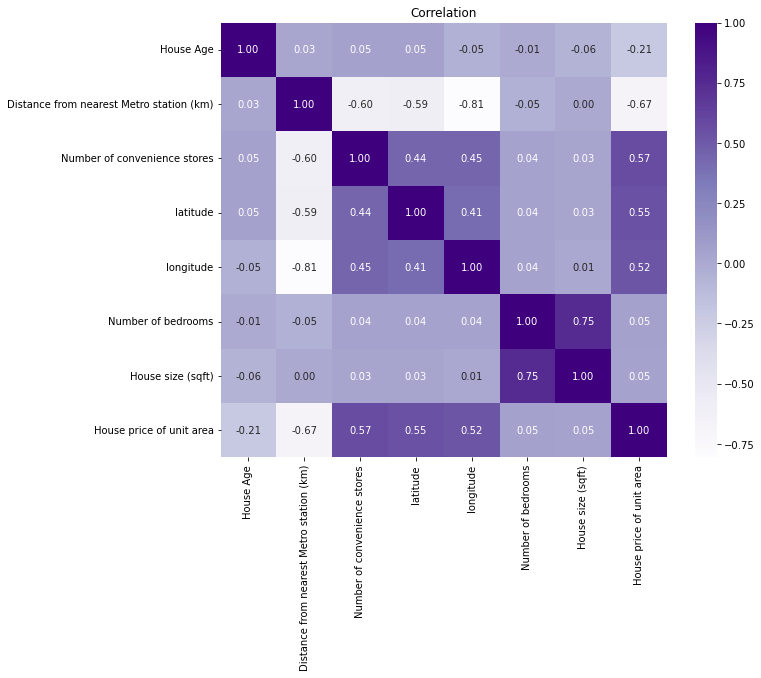

In [8]:
plt.figure(figsize=(10,8))
col=data.corr()
sns.heatmap(col,annot=True,fmt='.2f',cmap="Purples");
plt.title("Correlation")
plt.show()

**Inference :** <br>

1. There is strong correlation between the target variable and most of the independent variables i.e, with Distance from nearest Metro station (km), Number of convenience stores, latitude, longitude while the target variable is very weakly related to the features, Number of bedrooms, House size (sqft) 

2. We can also see significant correlation between the independent variables, 

#### Bar plot
Count of houses with their Number of bedrooms. 

In [10]:
values = data['Number of bedrooms'].value_counts().rename_axis('Levels').reset_index(name='Count')
bedrooms = pd.DataFrame(values)

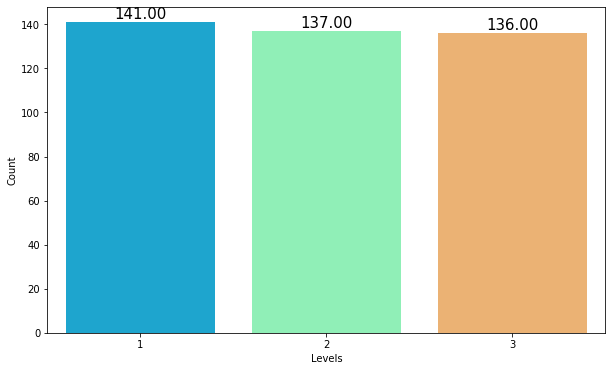

In [11]:
plt.figure(figsize=(10, 6))
 
plots = sns.barplot(x="Levels", y="Count", data=bedrooms, palette='rainbow')
plots.set_xticklabels(labels=bedrooms['Levels'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 

plt.show();

#### Density Plot

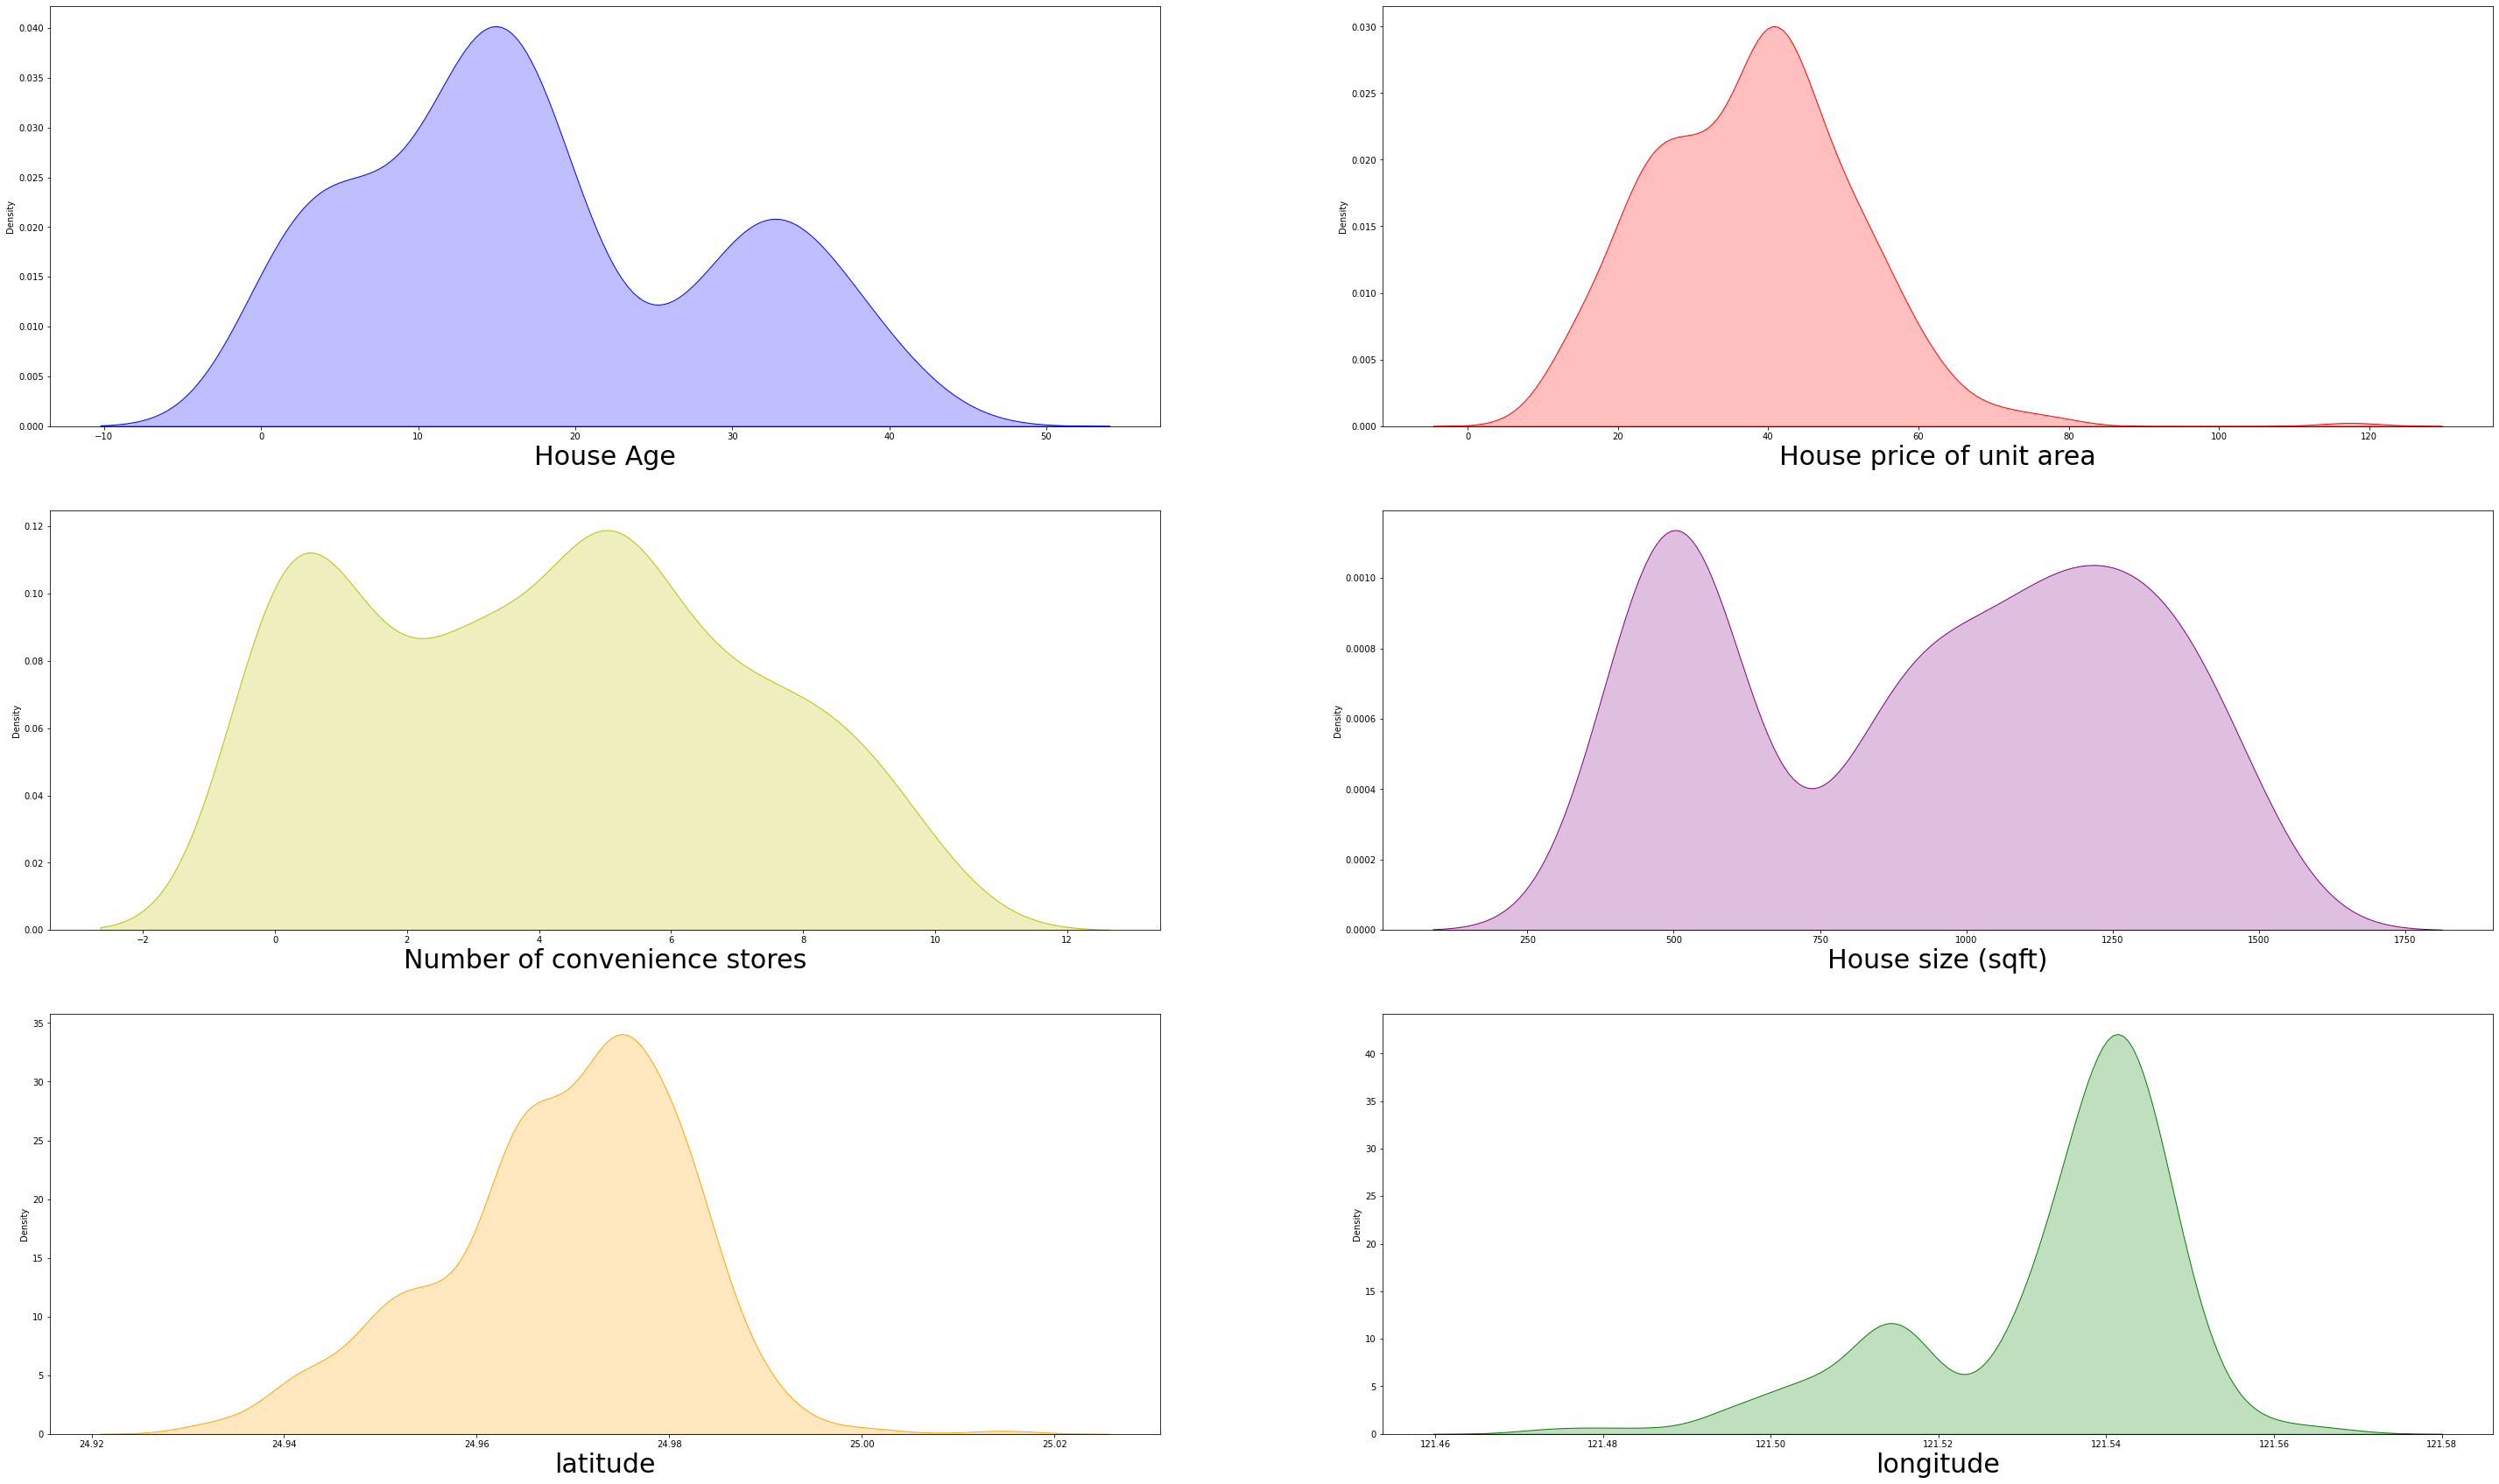

In [12]:
figure, ax=plt.subplots(3,2, figsize=(50,30))

plot1=sns.kdeplot(x=data["House Age"], ax=ax[0][0],color='b', shade=True)
plot1.set_xlabel("House Age", fontsize=30)

plot2=sns.kdeplot(x=data["House price of unit area"], ax=ax[0][1],color='r', shade=True)
plot2.set_xlabel("House price of unit area", fontsize=30);

plot3=sns.kdeplot(x=data["Number of convenience stores"], ax=ax[1][0],color='y', shade=True)
plot3.set_xlabel("Number of convenience stores", fontsize=30)

plot4=sns.kdeplot(x=data["House size (sqft)"], ax=ax[1][1],color='purple', shade=True)
plot4.set_xlabel("House size (sqft)", fontsize=30);


plot5=sns.kdeplot(x=data["latitude"], ax=ax[2][0],color='orange', shade=True)
plot5.set_xlabel("latitude", fontsize=30)

plot6=sns.kdeplot(x=data["longitude"], ax=ax[2][1],color='g', shade=True)
plot6.set_xlabel("longitude", fontsize=30);


**Inference :** <br>
From the density plot we get to know about the distribution of a particular feature in the dataset.
1. Latitude is somewhat normally distribution amongst the other features.
2. We can say that there is a possibility of presence of outliers in the variable House Price.
3. The distribution of variable longitude is somehat left skewed. 
4. The other variable i.e.,Number of convenience stores, House Age, House size (sqft) has no specific distribution.

### Checking for missing values

In [13]:
data.isnull().sum()
#no missing values are present

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

### Outliers Detection

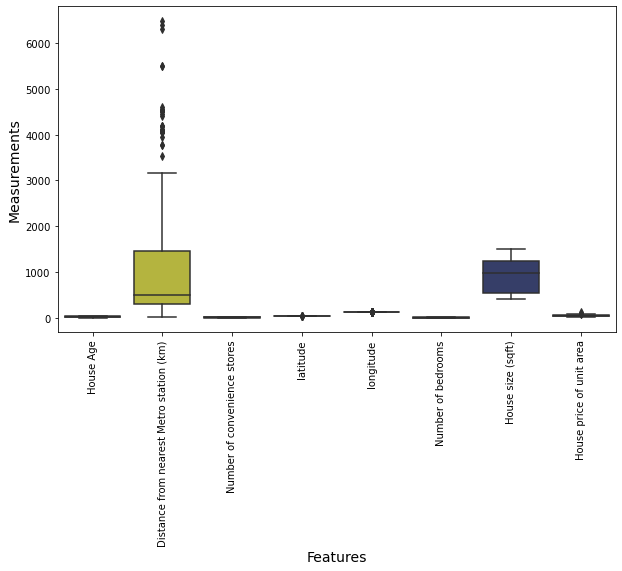

In [14]:
df=pd.melt(data)

plt.figure(figsize=(10,6))

boxplot1=sns.boxplot(x="variable", y="value", data=df, palette="gist_stern_r")
boxplot1.set_xlabel("Features", fontsize=14)
boxplot1.set_ylabel("Measurements", fontsize=14)
plt.xticks(rotation=90)
plt.show()

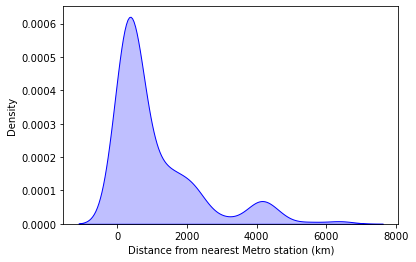

In [15]:
sns.kdeplot(data=data, x="Distance from nearest Metro station (km)", color='b', shade=True);

In [16]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [17]:
sample_outliers = detect_outliers_iqr(data['Distance from nearest Metro station (km)'])
print("Outliers from IQR method for Distance from nearest Metro station (km): ", len(sample_outliers))

Outliers from IQR method for Distance from nearest Metro station (km):  37


**Inference :** From both the techniques i.e., vizualization and IQR method we can see that there are 37 outliers in the variable Distance from nearest Metro station (km).

### Treating Outliers
I have created two dataset df1 and df2 ,df1 in which I have dropped the outliers and in the df2 I have applied log transformation to treat the outliers present in the variable.

In [18]:
#dropping outliers
index=[]
for i in sample_outliers:
    index.append(np.where(data['Distance from nearest Metro station (km)']==i)[0][0])

In [18]:
df1 = data.drop(index)
df1.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [19]:
df2 = data.copy(deep=True)
df2.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


<AxesSubplot:xlabel='new_distance', ylabel='Density'>

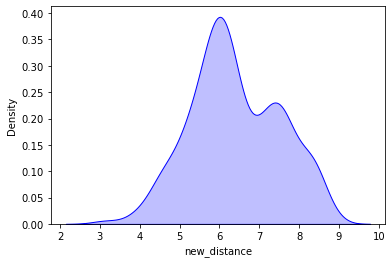

In [20]:
df2["new_distance"] = df2["Distance from nearest Metro station (km)"].map(lambda i: np.log(i) if i > 0 else 0) 
df2.drop(['Distance from nearest Metro station (km)'],axis=1, inplace=True)
sns.kdeplot(data=df2, x="new_distance", color='b', shade=True)

In [21]:
df2.head()

,House Age,Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,new_distance
0,32.0,10,24.98298,121.54024,1,575,37.9,4.441225
1,19.5,9,24.98034,121.53951,2,1240,42.2,5.725527
2,13.3,5,24.98746,121.54391,3,1060,47.3,6.331474
3,13.3,5,24.98746,121.54391,2,875,54.8,6.331474
4,5.0,5,24.97937,121.54245,1,491,43.1,5.967603


In [22]:
print("Shape of dataframe with outliers: " + str(df1.shape))
print("Shape of dataframe with outliers: " + str(df2.shape))

Shape of dataframe with outliers: (393, 8)
Shape of dataframe with outliers: (414, 8)


### Exporting the clean dataset

In [23]:
df1.to_csv("E:/A/P/internships/shack lab/q1_df1.csv", index=False)
df2.to_csv("E:/A/P/internships/shack lab/q1_df2.csv", index=False)

### Data Preparation

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def split_and_scale(df):
    #define predictor variables
    X = df.drop(['House price of unit area'], axis=1)
    #define response variable
    y = df['House price of unit area']

    #scaling the independent variables
    scaler = StandardScaler()
    X_scaled=scaler.fit_transform(X)
    X_train,X_test, y_train,y_test = train_test_split(X_scaled, y, train_size =0.8, random_state = 0)
    
    return X_train, X_test, y_train, y_test

### Comparing Models

In [25]:
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()
random = RandomForestRegressor()
extra_trees = ExtraTreesRegressor()

model_name = [lr, dt, random, extra_trees]

In [26]:
def models(model,df):
    X_train, X_test, y_train, y_test = split_and_scale(df)
    fitted_model=model.fit(X_train, y_train)
    y_test_pred = fitted_model.predict(X_test)
    
    algoname= model.__class__.__name__
    score = round(sm.r2_score(y_test, y_test_pred),2)
    mae = round(sm.mean_absolute_error(y_test, y_test_pred),2)
    rmse = round(np.sqrt(sm.mean_squared_error(y_test, y_test_pred)),2)
    return algoname, score, mae, rmse

In [27]:
result = pd.DataFrame()

#for dataframe 1
for i in model_name:
    score=[]
    score.append(models(i,df1))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    result= pd.concat([result,r])
result.insert(loc = 0,column = 'Dataset', value = 'Dropping Outliers')

#for dataframe 2
for i in model_name:
    score=[]
    score.append(models(i,df2))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset']='Treating Outliers'
    result= pd.concat([result,r])

In [28]:
result

,Dataset,Model,Score,MAE,RMSE
0,Dropping Outliers,LinearRegression,0.62,5.79,7.82
0,Dropping Outliers,DecisionTreeRegressor,0.64,5.46,7.62
0,Dropping Outliers,RandomForestRegressor,0.81,4.42,5.50
0,Dropping Outliers,ExtraTreesRegressor,0.76,4.76,6.27
0,Treating Outliers,LinearRegression,0.73,4.82,6.89
0,Treating Outliers,DecisionTreeRegressor,0.46,6.56,9.68
0,Treating Outliers,RandomForestRegressor,0.69,4.86,7.28
0,Treating Outliers,ExtraTreesRegressor,0.67,5.20,7.53


### Hyperparameter tuning

In [29]:
params_dt = {'max_depth': [2, 3, 5, 10, 0],
             'min_samples_leaf': [5, 10, 0, 50, 100],
             'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}

params_rf = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
            'max_depth': [80, 90, 100, 110],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'n_estimators': [100, 200, 300, 1000]}

params_et = {'criterion': ['squared_error', 'absolute_error'],
            'max_depth': [80, 90, 100, 110],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'n_estimators': [100, 200, 300, 1000]}

params=[params_dt, params_rf, params_et]
algo=[dt,random, extra_trees]

In [30]:
from sklearn.model_selection import GridSearchCV

def models_with_hyperparams(df, params, model):
    X_train, X_test, y_train, y_test = split_and_scale(df)
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring = "accuracy")
    grid_search.fit(X_train, y_train)
    grid_search.best_estimator_
    best_grid=grid_search.best_estimator_
    y_test_pred=best_grid.predict(X_test)
    
    algoname= model.__class__.__name__
    score = round(sm.r2_score(y_test, y_test_pred),2)
    mae = round(sm.mean_absolute_error(y_test, y_test_pred),2)
    rmse = round(np.sqrt(sm.mean_squared_error(y_test, y_test_pred)),2)
    
    return algoname, score, mae, rmse

In [31]:
#for dataframe 1
for  i, j in zip(params,algo):
    score=[]
    score.append(models_with_hyperparams(df1,i,j))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset'] = 'Dropping Outliers (Hyperparameter tuning)'
    result= pd.concat([result,r])

In [32]:
#for dataframe 2
for  i, j in zip(params,algo):
    score=[]
    score.append(models_with_hyperparams(df2,i,j))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset'] = 'Treating Outliers (Hyperparameter tuning)'
    result= pd.concat([result,r])

### Boosting Algorithms with QuantileTransformer 

I have used Quantile Transformation to normalize the unskewwed features.

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(a,df):
    X_train, X_test, y_train, y_test = split_and_scale(df)
    
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=a, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    y_test_pred = regr_trans.predict(X_test)
    algoname= a.__class__.__name__
    score = round(sm.r2_score(y_test, y_test_pred),2)
    mae = round(sm.mean_absolute_error(y_test, y_test_pred),2)
    rmse = round(np.sqrt(sm.mean_squared_error(y_test, y_test_pred)),2)
    return algoname, score, mae, rmse

In [34]:
algos = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), ExtraTreesRegressor(),
      GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]

for i in algos:
    score=[]
    score.append(boost_models(i,df1))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset'] = 'Dropping Outliers and Normalized Dataset'
    result= pd.concat([result,r])
    
for i in algos:
    score=[]
    score.append(boost_models(i,data))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset'] = 'With Outliers and Normalized Dataset'
    result= pd.concat([result,r])

In [35]:
result

,Dataset,Model,Score,MAE,RMSE
0,Dropping Outliers,LinearRegression,0.62,5.79,7.82
0,Dropping Outliers,DecisionTreeRegressor,0.64,5.46,7.62
0,Dropping Outliers,RandomForestRegressor,0.81,4.42,5.50
0,Dropping Outliers,ExtraTreesRegressor,0.76,4.76,6.27
0,Treating Outliers,LinearRegression,0.73,4.82,6.89
0,Treating Outliers,DecisionTreeRegressor,0.46,6.56,9.68
0,Treating Outliers,RandomForestRegressor,0.69,4.86,7.28
0,Treating Outliers,ExtraTreesRegressor,0.67,5.20,7.53
0,Dropping Outliers (Hyperparameter tuning),DecisionTreeRegressor,0.66,5.73,7.42
0,Dropping Outliers (Hyperparameter tuning),RandomForestRegressor,0.76,4.75,6.20


### Feature Engineering and Transformation
To see if can we improvise the accuracy of the prediction I have tried feature transformation and feature engineering. <br>

- Feature Engineering : 
1. Converted Number of convenience stores into a categorical variable where in If the Number of convenience stores are more than 5 for a house it will be classifed as 1 or else 0.
2. Added a new variable as "cust_type", Grouping similar customers into clusters using KMeans.

- Feature Transformation: From our EDA, we know that the distribution of the features are skewed , i have applied QuantileTransformer to normalize this behavior.


In [36]:
df3=data.copy()

In [37]:
df3.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


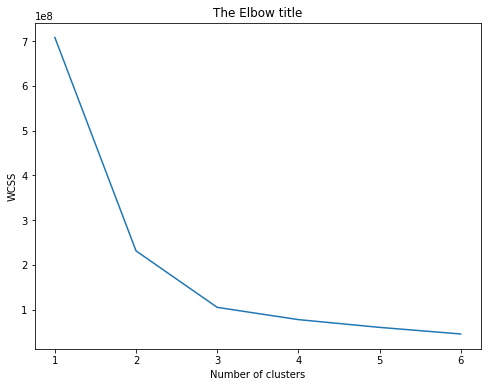

In [38]:
from sklearn.cluster import KMeans
distance=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df3)
    distance_iter = kmeans.inertia_
    distance.append(distance_iter)

number_clusters = range(1,7)    
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(number_clusters,distance)
ax.set(title='The Elbow title', 
      xlabel='Number of clusters', 
      ylabel='WCSS');


In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df3)
df3['cust_type'] = kmeans.predict(df3)

In [40]:
df3['convenience stores']=df3['Number of convenience stores'].apply(lambda x:0 if x<6 else 1)
df3.drop(['Number of convenience stores'], axis=1, inplace=True)
df3.head()

,House Age,Distance from nearest Metro station (km),latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,cust_type,convenience stores
0,32.0,84.87882,24.98298,121.54024,1,575,37.9,1,1
1,19.5,306.59470,24.98034,121.53951,2,1240,42.2,1,1
2,13.3,561.98450,24.98746,121.54391,3,1060,47.3,1,0
3,13.3,561.98450,24.98746,121.54391,2,875,54.8,1,0
4,5.0,390.56840,24.97937,121.54245,1,491,43.1,1,0


In [41]:
for i in model_name:
    score=[]
    score.append(models(i,(df3)))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset']='Feature Engineered and Transformed'
    result= pd.concat([result,r])

for  i, j in zip(params,algo):
    score=[]
    score.append(models_with_hyperparams(df3,i,j))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset']='Feature Engineered and Transformed (Hyperparameter tuning)'
    result= pd.concat([result,r])

for i in algo:
    score=[]
    score.append(boost_models(i,df3))
    r=pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])
    r['Dataset']='Feature Engineered and Transformed'
    result= pd.concat([result,r])

In [42]:
result.reset_index(drop=True)

,Dataset,Model,Score,MAE,RMSE
0,Dropping Outliers,LinearRegression,0.62,5.79,7.82
1,Dropping Outliers,DecisionTreeRegressor,0.64,5.46,7.62
2,Dropping Outliers,RandomForestRegressor,0.81,4.42,5.50
3,Dropping Outliers,ExtraTreesRegressor,0.76,4.76,6.27
4,Treating Outliers,LinearRegression,0.73,4.82,6.89
5,Treating Outliers,DecisionTreeRegressor,0.46,6.56,9.68
6,Treating Outliers,RandomForestRegressor,0.69,4.86,7.28
7,Treating Outliers,ExtraTreesRegressor,0.67,5.20,7.53
8,Dropping Outliers (Hyperparameter tuning),DecisionTreeRegressor,0.66,5.73,7.42
9,Dropping Outliers (Hyperparameter tuning),RandomForestRegressor,0.76,4.75,6.20


***Conclusion :*** <br>
The result dataframe give the comparative results of all the models used for all the dataframes.<br>
We can say that the highest accuracy is of the Model Random forest Regressor for the dataset in which we are dropping the Outliers with a R2 value of 0.81, MAE: 4.42 and RMSE:	5.50